In [5]:
import pandas as pd
import numpy as np
import tensorflow.keras as tf
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [3]:
X, y = make_classification(n_samples= 100, n_features=2, n_informative=1, n_redundant=0,n_classes= 2, n_clusters_per_class=1, random_state=42)


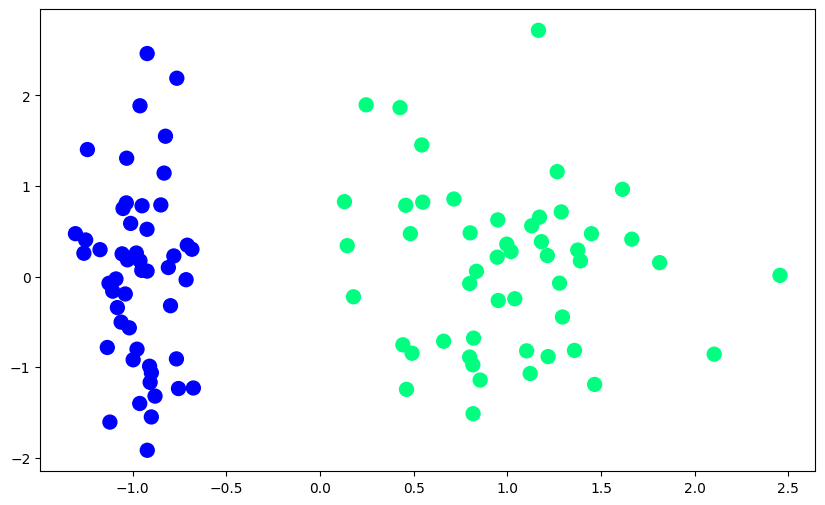

In [6]:
plt.figure(figsize= (10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap= 'winter', s= 100)

In [13]:
df2 = pd.DataFrame(data= X, columns= ['X1', 'X2'])
df1 = pd.DataFrame(data= y, columns= ['y'])

df = pd.concat([df2, df1], axis= 1)
### Dataframe


In [15]:
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [18]:
initialize_parameters([2, 4, 1])

{'W1': array([[0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1],
        [0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [19]:
def sigmoid(z):
    A = 1/(1 + np.exp(-z))
    return A

In [20]:
def linear_forward(A_prev, W, b):
    Z = np.dot(W.T, A_prev) + b
    A = sigmoid(Z)
    return A
    

In [21]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev


In [24]:
def update_parameters(parameters,y,y_hat,A1,X):
    parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
    parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
    parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

    parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
    parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
    parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

    parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
    parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
    parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [26]:
X = df[['X1', 'X2']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['y']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.6421300607143715


{'W1': array([[0.10000057, 0.10000056],
        [0.10000057, 0.10000056]]),
 'b1': array([[1.18216343e-06],
        [1.18216343e-06]]),
 'W2': array([[0.10002482],
        [0.10002482]]),
 'b2': array([[0.10007221]])}

In [27]:
X = df[['X1', 'X2']].values[1].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['y']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.7961330348257555


{'W1': array([[0.10000155, 0.10000061],
        [0.10000155, 0.10000061]]),
 'b1': array([[-1.88213121e-07],
        [-1.88213121e-07]]),
 'W2': array([[0.09999841],
        [0.09999841]]),
 'b2': array([[0.09994351]])}

In [28]:
X = df[['X1', 'X2']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['y']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.5936859394728053


{'W1': array([[0.10000298, 0.1000014 ],
        [0.10000298, 0.1000014 ]]),
 'b1': array([[9.20180901e-07],
        [9.20181109e-07]]),
 'W2': array([[0.10002302],
        [0.10002302]]),
 'b2': array([[0.1000678]])}

In [29]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 50

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['X1', 'X2']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['y']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.6960952289177225
Epoch -  2 Loss -  0.6956232121883589
Epoch -  3 Loss -  0.6956124125275593
Epoch -  4 Loss -  0.6956016592286781
Epoch -  5 Loss -  0.6955909520582796
Epoch -  6 Loss -  0.695580290784103
Epoch -  7 Loss -  0.695569675175054
Epoch -  8 Loss -  0.6955591050012023
Epoch -  9 Loss -  0.6955485800337715
Epoch -  10 Loss -  0.6955381000451359
Epoch -  11 Loss -  0.6955276648088139
Epoch -  12 Loss -  0.6955172740994611
Epoch -  13 Loss -  0.695506927692866
Epoch -  14 Loss -  0.6954966253659418
Epoch -  15 Loss -  0.6954863668967238
Epoch -  16 Loss -  0.6954761520643603
Epoch -  17 Loss -  0.6954659806491084
Epoch -  18 Loss -  0.6954558524323287
Epoch -  19 Loss -  0.6954457671964783
Epoch -  20 Loss -  0.6954357247251061
Epoch -  21 Loss -  0.6954257248028464
Epoch -  22 Loss -  0.6954157672154139
Epoch -  23 Loss -  0.6954058517495973
Epoch -  24 Loss -  0.695395978193255
Epoch -  25 Loss -  0.6953861463353079
Epoch -  26 Loss -  0.6953763559657352

{'W1': array([[0.10587394, 0.1001763 ],
        [0.10587213, 0.10017764]]),
 'b1': array([[-0.00058658],
        [-0.0005863 ]]),
 'W2': array([[0.09433185],
        [0.09415286]]),
 'b2': array([[0.09409839]])}